<a href="https://colab.research.google.com/github/iamutkarshgoyal/Aerofit_Statistical_Analysis/blob/main/Aerofit_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing important Liabraries**

In [37]:
# importing all required liabraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

####**Reading Data**

In [38]:
# importing data and assigning it to df variable
df = pd.read_csv("/content/drive/MyDrive/Data_Sets Analysis/Aerofit Data.csv")

In [39]:
# Checking top 5 values using head command
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [40]:
# Checking bottom 5 values using tail command
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [41]:
# Checking Shape of Data meand row count and column counts
df.shape

(180, 9)

In [42]:
# Column names in given data
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [43]:
# Checking how many unique value have in columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [44]:
# Checking if there is any null value in columns
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

In [45]:
# Getting some statistical measure for all integer columns
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [46]:
# Checking data type and other information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [47]:
# Getting some statistical measure for all String/Object columns
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### **Analyzing Data, Descriptive Statistics**

In [48]:
# Checking mean or average value for few columns
print("Average Age of People =", int(df.Age.mean().round()))
print("Average Fitness Rank of People =", int(df.Fitness.mean().round()))
print("Average Education of People =", int(df.Education.mean().round()))
print("Average income of People =", df.Income.mean().round(2))
print("Average Miles People Run =", df.Miles.mean().round(2))

Average Age of People = 29
Average Fitness Rank of People = 3
Average Education of People = 16
Average income of People = 53719.58
Average Miles People Run = 103.19


In [49]:
# Checking median or middle value for few columns
print("Median Value in Age Column =", int(df.Age.median().round()))
print("Median Value in Fitness Column =", int(df.Fitness.median().round()))
print("Median Value in Education Column =", int(df.Education.median().round()))
print("Median Value in income Column =", df.Income.median().round(2))
print("Median Value in Miles Column =", df.Miles.median().round(2))

Median Value in Age Column = 26
Median Value in Fitness Column = 3
Median Value in Education Column = 16
Median Value in income Column = 50596.5
Median Value in Miles Column = 94.0


In [50]:
# Checking mode or most repeated value for few columns
print(f"Most repeated value in Age column is", int(df.Age.mode().round()), "which repeated", df[df["Age"] == df.Age.mode().values[0]]["Age"].value_counts().values[0],"times.")
print(f"Most repeated value in Fitness column is", int(df.Fitness.mode().round()), "which repeated", df[df["Fitness"] == df.Fitness.mode().values[0]]["Fitness"].value_counts().values[0],"times.")
print(f"Most repeated value in Education column is", int(df.Education.mode().round()), "which repeated", df[df["Education"] == df.Education.mode().values[0]]["Education"].value_counts().values[0],"times.")
print(f"Most repeated value in Income column is", int(df.Income.mode().round()), "which repeated", df[df["Income"] == df.Income.mode().values[0]]["Income"].value_counts().values[0],"times.")
print(f"Most repeated value in Miles column is", int(df.Miles.mode().round()), "which repeated", df[df["Miles"] == df.Miles.mode().values[0]]["Miles"].value_counts().values[0],"times.")

Most repeated value in Age column is 25 which repeated 25 times.
Most repeated value in Fitness column is 3 which repeated 97 times.
Most repeated value in Education column is 16 which repeated 85 times.
Most repeated value in Income column is 45480 which repeated 14 times.
Most repeated value in Miles column is 85 which repeated 27 times.


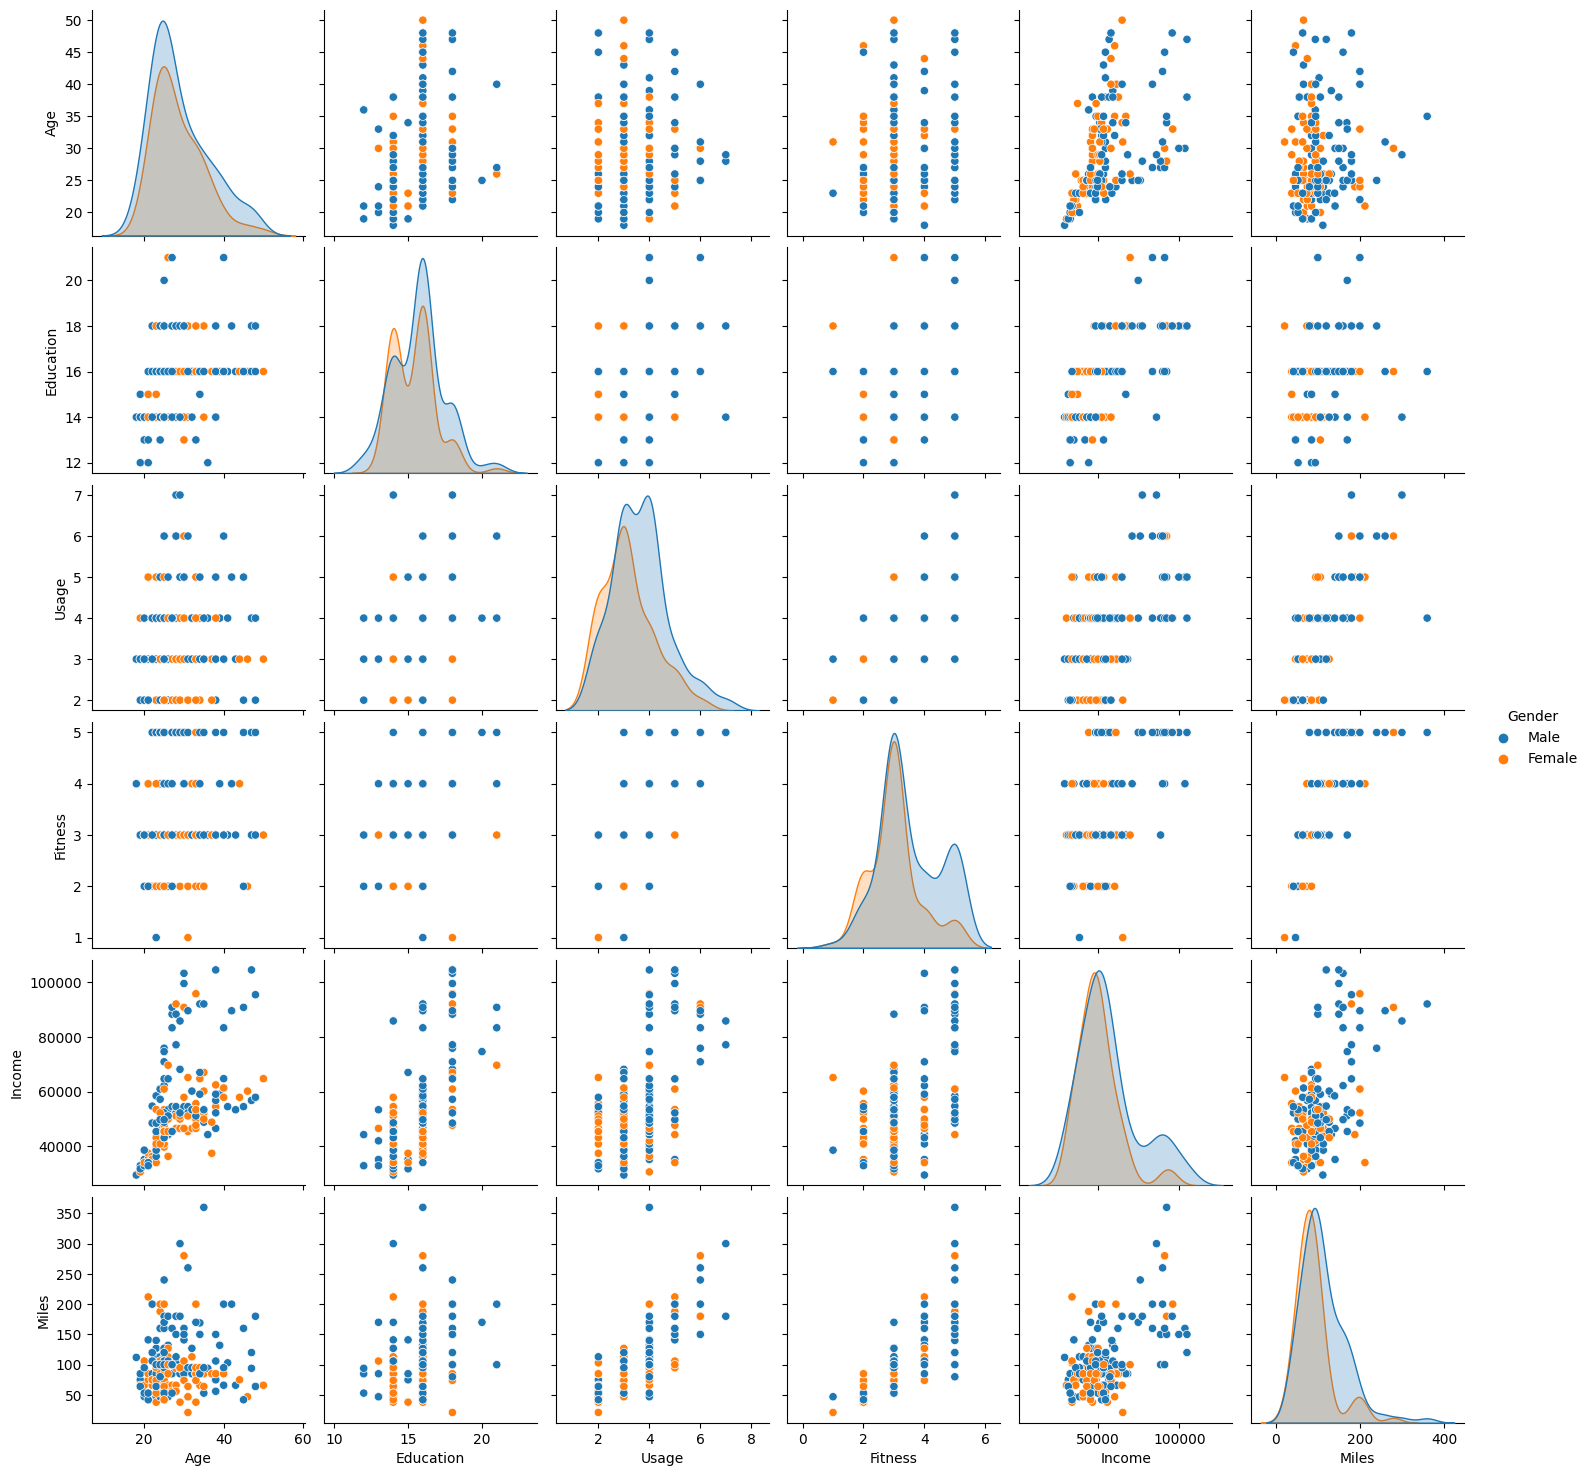

In [51]:
sns.pairplot(df, hue = "Gender")
plt.show()

#### **Univariate Analysis and Data Visualization**

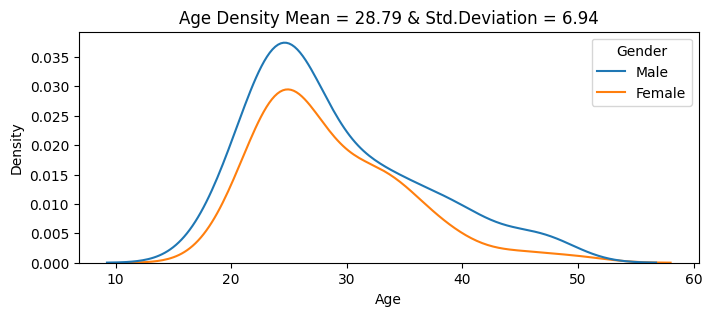

In [52]:
# Plotting a density chart to measure for what age we have more people
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "Gender")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()



---


1.   As per above diagram, most of the people are between Age 24 to 27 among Male and Female both.
2.As per univariate analysis on Age column, we can see we have More male buyers in comparison of Female.
3. Mean Age of the population is 29 years with standard deviation of 6.94 which is almost 7 means data spread out in complete range of age.

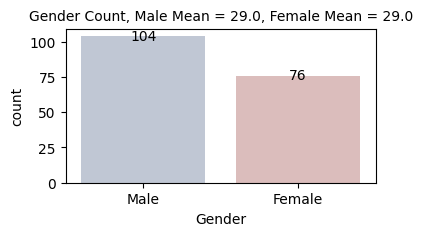

In [53]:
# Plotting bar plot to for Gender Count
plt.figure(figsize = (4,2))
ax = sns.countplot(data = df, x = "Gender", palette = "vlag")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
Male_mean = df[df.Gender.isin(["Male"])].Age.mean().round()
Female_mean = df[df.Gender.isin(["Female"])].Age.mean().round()
plt.title(f"Gender Count, Male Mean = {Male_mean}, Female Mean = {Female_mean}", fontdict = {'fontsize': (10)})
plt.show()



---


We have customer ration of (4:3) in terms of Gender distribution.

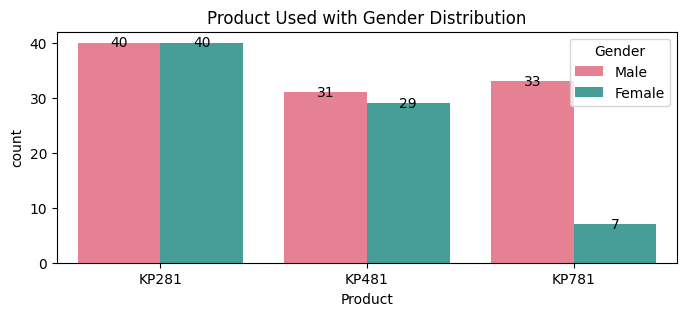

In [54]:
# Plotting a Countplot to measure different Product Used with Gender distribution
plt.figure(figsize = (8,3))
ax = sns.countplot(data = df, x = "Product", hue = "Gender", palette = "husl")
plt.title("Product Used with Gender Distribution")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
plt.show()



---


As per above chart most popular product for Aerofit is KP281 which equally used by both Male and Female.

2nd most popular product is KP481 which used by maled population in comparison to Female.

The least popular product out of 3 is KP781 which is mostly popular in Male as they used it more in comparison of Female.

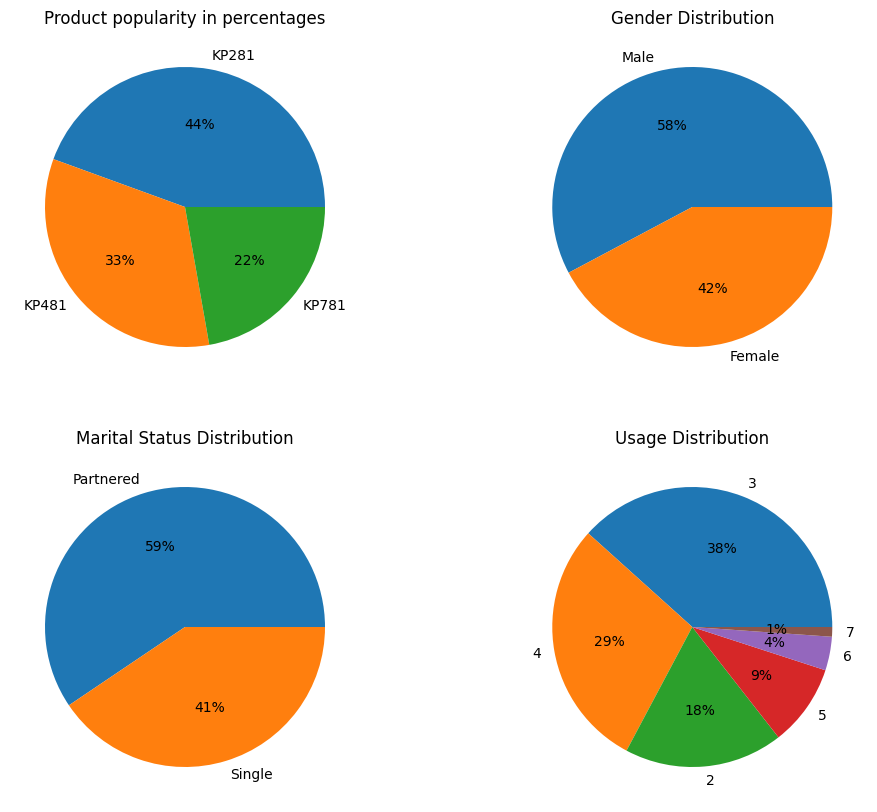

In [55]:
# Plotting piechart for univariate distribution

Product_values = df.Product.value_counts().values
Gender_values = df.Gender.value_counts().values
MaritalStatus_values = df.MaritalStatus.value_counts().values
usage_values = df.Usage.value_counts().values

Product_keys = df.Product.value_counts().index.to_list()
Gender_keys = df.Gender.value_counts().index.to_list()
MaritalStatus_keys = df.MaritalStatus.value_counts().index.to_list()
usage_keys = df.Usage.value_counts().index.to_list()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_size_inches(12,10)

ax1.pie(x = Product_values, labels = Product_keys, autopct='%.0f%%')
ax2.pie(x = Gender_values, labels = Gender_keys, autopct='%.0f%%')
ax3.pie(x = MaritalStatus_values, labels = MaritalStatus_keys, autopct='%.0f%%')
ax4.pie(x = usage_values, labels = usage_keys, autopct = "%.0f%%")

ax1.set_title("Product popularity in percentages")
ax2.set_title("Gender Distribution")
ax3.set_title("Marital Status Distribution")
ax4.set_title("Usage Distribution")

plt.show()



---


**Product popularity in percentages** : KP281 was the most used product, used 44% by Aerofit users. followed by KP481 product which used by 33%. Both are the Beginner level tradmills. KP781 which advance treadmill and used by only 22% users of business.

**Gender Distribution** : There are 58% Male users and 42% Female users.

**Marital Status Distribution** : There are 59% users have partner and 41% people are single.

**Usage Distribution** :
There are only 1% of user who use treadmill for all 7 days in a week and 4%

1.   There are only 1% of user who use treadmill for all 7 days in a week and 4% users who used for 6 days in a week, only 9% user use treadmill for 5 days.
2.   29% of user use treadmill for 4 days, 38% user use it for 3 days and 18% user use treamill for 2 days only in a week.







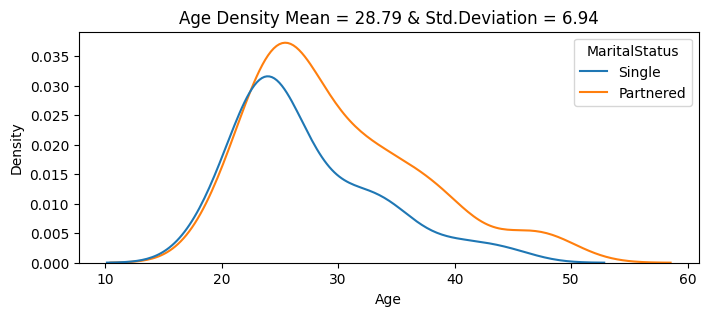

In [56]:
# Plotting a density chart for Age with Martial Status
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "MaritalStatus")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()



---


We can clearly see there are more population who have partnered over single person.

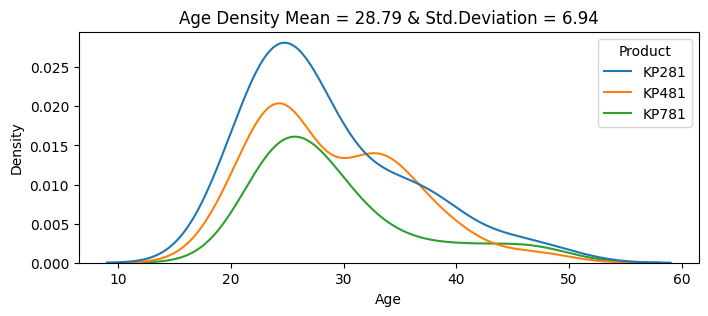

In [100]:
# Plotting a density chart for Age with Product
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "Product")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()

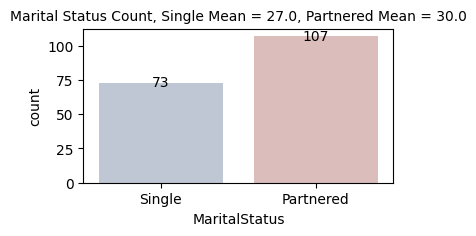

In [57]:
# Plotting bar plot to for Marital Status count
plt.figure(figsize = (4,2))
ax = sns.countplot(data = df, x = "MaritalStatus", palette = "vlag")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
Single_mean = df[df.MaritalStatus.isin(["Single"])].Age.mean().round()
Partnered_mean = df[df.MaritalStatus.isin(["Partnered"])].Age.mean().round()
plt.title(f"Marital Status Count, Single Mean = {Single_mean}, Partnered Mean = {Partnered_mean}", fontdict = {'fontsize': (10)})
plt.show()

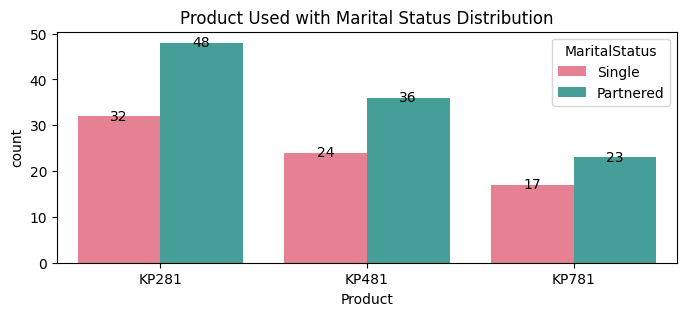

In [58]:
# Plotting a Countplot to measure different Product Used with Marital Status distribution
plt.figure(figsize = (8,3))
ax = sns.countplot(data = df, x = "Product", hue = "MaritalStatus", palette = "husl")
plt.title("Product Used with Marital Status Distribution")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
plt.show()



---


There is clear spike in all products for partnered people.

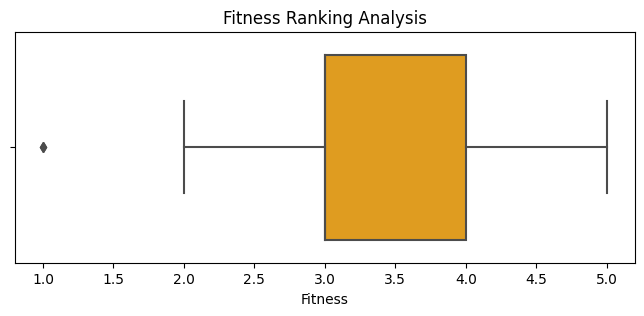

In [59]:
# Boxplot for Fitness univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Fitness", color = "Orange")
plt.title("Fitness Ranking Analysis")
plt.show()

In [60]:
# Outliers in terms of Fitness
df[df.Fitness.isin([1])]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21




---


As per the Boxplot on Fitness univariate analysis, above lines are outliers for Fitness variable, as there are only 2 values which is less then its Standard Deviation.

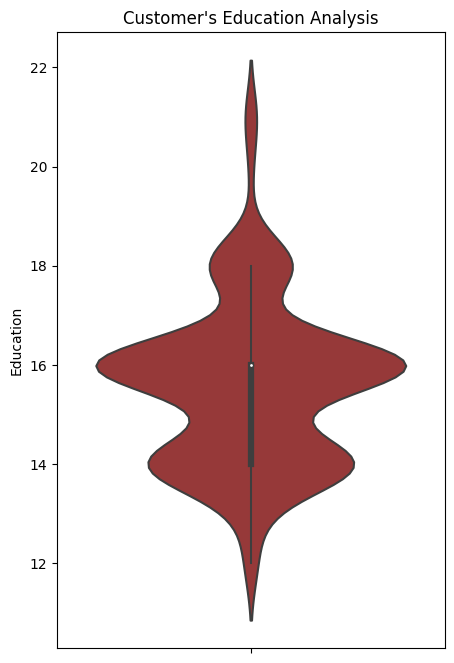

In [61]:
# Violin plot for Education univariate variable
plt.figure(figsize = (5,8))
sns.violinplot(data = df, y = "Education", color = "Brown")
plt.title("Customer's Education Analysis")
plt.show()



---


Mean = 16, Mode = 16 and Median = 16 of Education variable is the Equall and there are outliers as well which are equal and greater then 20.

In [62]:
# Outliers in Education Variable
df[df.Education.isin([20,21,22,23])]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200




---


Above lines are outliers for Education column as majority of customers are near
to 16.

Interestingly all these 4 customer's used KP781 product.

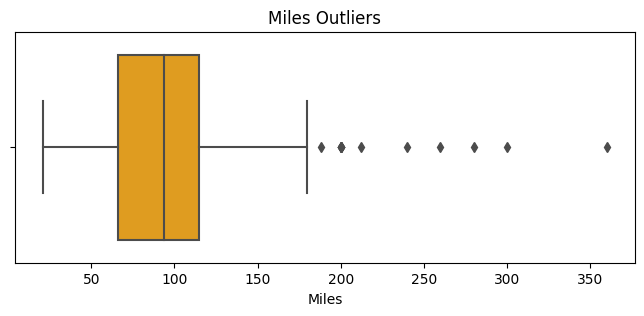

In [89]:
# boxlot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Miles", hue = "Product", color = "Orange")
plt.title("Miles Outliers")
plt.show()

In [93]:
# Miles Outliers
df[df["Miles"]>190]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
173,KP781,35,Male,16,Partnered,4,5,92131,360




---


We can not say Outliers to these values as these are only related to product KP781 which is advanced treadmills and used by professional and as per database most of the people having highest Fitness rank 5.

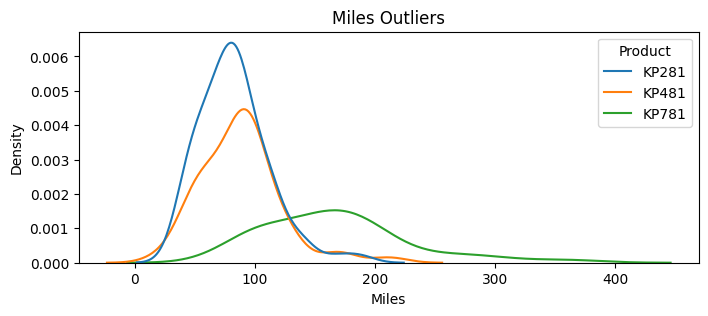

In [83]:
# kdeplot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Miles", hue = "Product", color = "Orange")
plt.title("Miles Outliers")
plt.show()

As per diagram, KP281 & KP481 having similar mean and KP781 acting as Outlier in above distribution.

In [99]:
print("Mean for Product KP281 in terms of Miles =", df[df["Product"] == "KP281"].Miles.mean().round(2))
print("Mean for Product KP481 in terms of Miles =", df[df["Product"] == "KP481"].Miles.mean().round(2))
print("Mean for Product KP781 in terms of Miles =", df[df["Product"] == "KP781"].Miles.mean().round(2))

Mean for Product KP281 in terms of Miles = 82.79
Mean for Product KP481 in terms of Miles = 87.93
Mean for Product KP781 in terms of Miles = 166.9




---


There is clearlly difference in mean for starting treadmills [KP281 & KP481] and advanced treadmill [KP781].

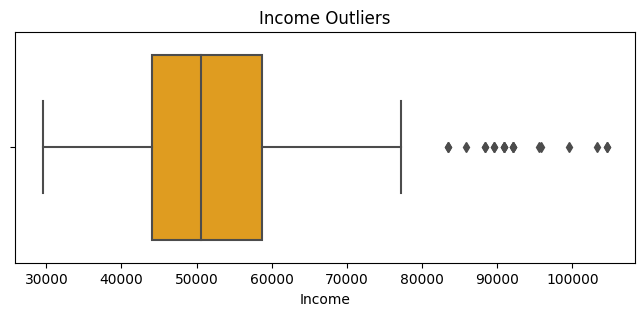

In [92]:
# boxlot for Income univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Income", hue = "Product", color = "Orange")
plt.title("Income Outliers")
plt.show()

In [95]:
# Income Outliers
df[df["Income"] > 80000]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260




---


As per above outcome outliers belongs to those people who used KP781 product which is advanced treadmill, as per Fitness variable people have the best Fitness ranking.

Indicating to maintain the best Fitness ranking which is 5 where mean value for Fitness variable is 3 only, people need to run more hence the reason is these are outliers among the complete data.  

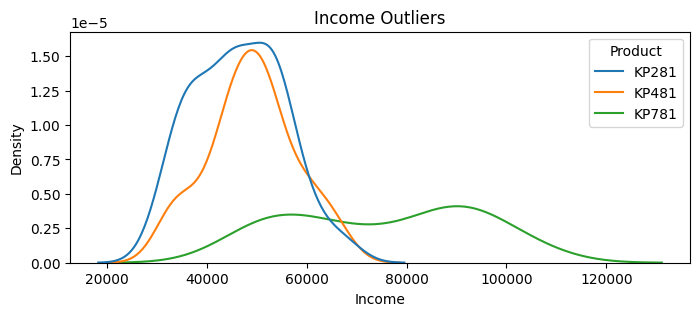

In [96]:
# kdeplot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Income", hue = "Product", color = "Orange")
plt.title("Income Outliers")
plt.show()



---


As per diagram, KP281 & KP481 having similar mean and KP781 acting as Outlier in above distribution.

In [98]:
print("Mean for Product KP281 in terms of Income =", df[df["Product"] == "KP281"].Income.mean().round(2))
print("Mean for Product KP481 in terms of Income =", df[df["Product"] == "KP481"].Income.mean().round(2))
print("Mean for Product KP781 in terms of Income =", df[df["Product"] == "KP781"].Income.mean().round(2))

Mean for Product KP281 in terms of Income = 46418.02
Mean for Product KP481 in terms of Income = 48973.65
Mean for Product KP781 in terms of Income = 75441.58




---


There is clearlly difference in mean for starting treadmills [KP281 & KP481] and advanced treadmill [KP781].

It indicates it could be more costly then other 2 treadmills.

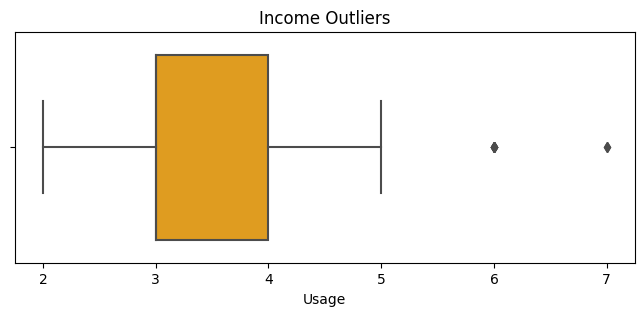

In [102]:
# boxlot for Usage univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Usage", hue = "Product", color = "Orange")
plt.title("Income Outliers")
plt.show()

####**Multi-Variate Analysis and Data Visualization**

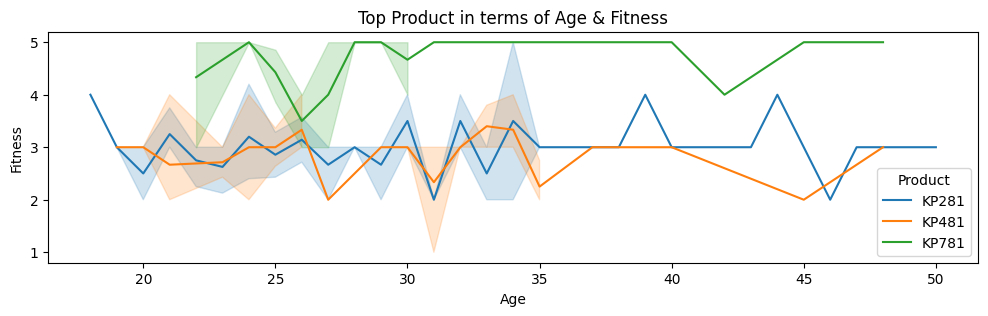

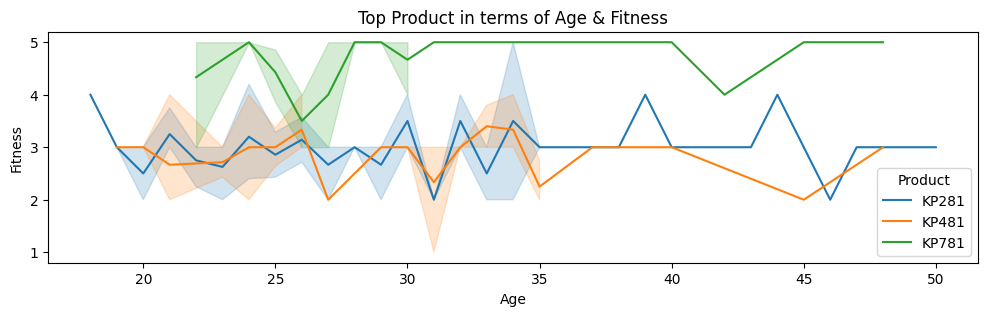

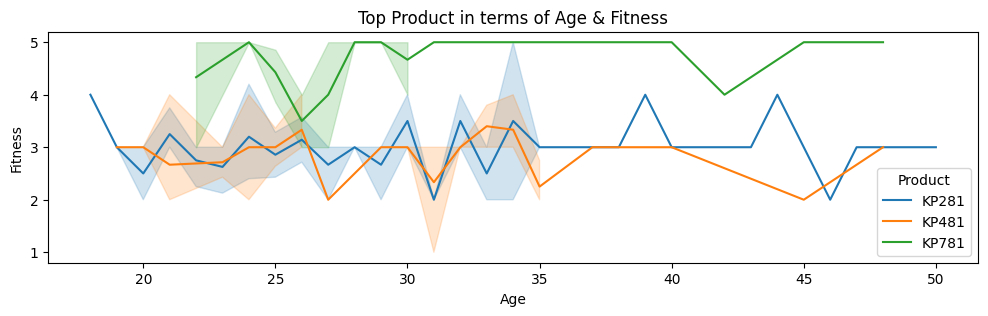

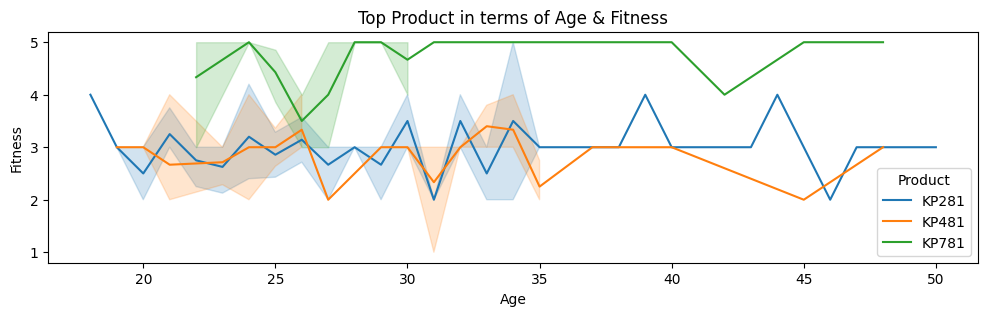

In [64]:
# Line Subplot for Product Analysis with different Variables

# Top Product in terms of Age & Fitness
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Fitness", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Fitness")
plt.show()

#Top Product in terms of Age & Education
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Fitness", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Fitness")
plt.show()

#Top Product in terms of Age & Income
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Fitness", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Fitness")
plt.show()

#Top Product in terms of Age & Miles
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Fitness", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Fitness")
plt.show()

It is clearlly visualized as per above chart most fittest person used KP781 product, whereas KP281 & KP481 were used almost equally.

In [65]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [66]:
z1 = norm.ppf(0.05)
z1

-1.6448536269514729

In [67]:
z2 = norm.ppf(0.95)
z2

1.6448536269514722

In [68]:
x1 = 3.5 + (z1 * 0.1)
x2 = 3.5 + (z2 * 0.1)
x1, x2

(3.3355146373048528, 3.6644853626951472)